In [1]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sc
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [2]:
x,y=make_moons(n_samples=250,noise=0.05)

In [4]:
df={"data1":x[:,0], "data2":x[:,1],"output":y}

In [5]:
dataset=pd.DataFrame(df)

In [6]:
dataset.head(3)

,data1,data2,output
0,0.178705,0.996750,0
1,1.070276,0.354559,0
2,1.768943,-0.126289,1


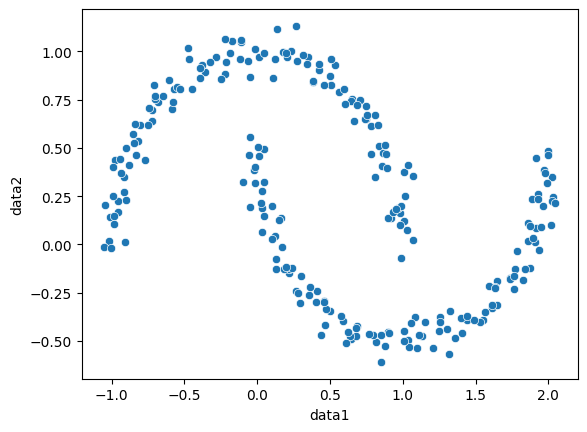

In [7]:
sns.scatterplot(x="data1",y="data2",data=dataset)
plt.show()

In [9]:
from sklearn.cluster import DBSCAN

In [12]:
db= DBSCAN(eps=0.2,min_samples=5)
dataset["predict"]=db.fit_predict(dataset)

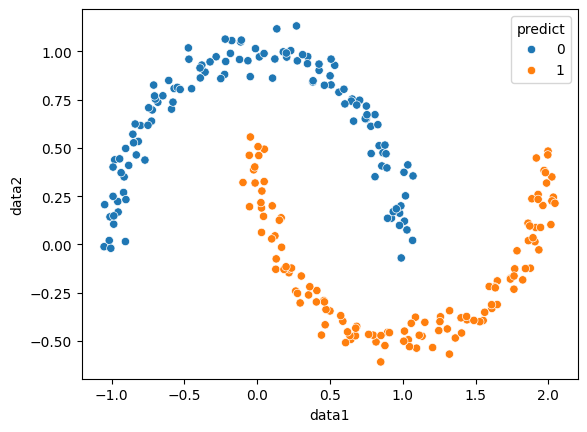

In [13]:
sns.scatterplot(x="data1",y="data2",data=dataset,hue="predict")
plt.show()

In [15]:
x=dataset.iloc[:,:-1]
y=dataset["output"]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [19]:
bg=BaggingClassifier(estimator=SVC(),n_estimators=30)
bg.fit(x_train,y_train)

BaggingClassifier(estimator=SVC(), n_estimators=30)

In [20]:
bg.score(x_train,y_train)*100, bg.score(x_test,y_test)*100

(100.0, 100.0)

In [21]:
vc=SVC()
vc.fit(x_train,y_train)

SVC()

In [22]:
vc.score(x_train,y_train)*100, vc.score(x_test,y_test)*100

(100.0, 100.0)

In [23]:
r=RandomForestClassifier(n_estimators=30)
r.fit(x_train,y_train)

RandomForestClassifier(n_estimators=30)

In [24]:
r.score(x_train,y_train)*100, r.score(x_test,y_test)*100

(100.0, 100.0)